In [72]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from geopy.distance import great_circle
import seaborn as sns
sns.set()

In [5]:
sd = pd.read_csv(r"E:\DataAnalysisProjects-master\nyc_taxi_trip_duration.csv")
sd

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848
...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447


In [7]:
sd.shape

(729322, 11)

In [18]:
sd.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [11]:
sd.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [13]:
sd.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [14]:
sd.describe

<bound method NDFrame.describe of                id  vendor_id      pickup_datetime     dropoff_datetime  \
0       id1080784          2  2016-02-29 16:40:21  2016-02-29 16:47:01   
1       id0889885          1  2016-03-11 23:35:37  2016-03-11 23:53:57   
2       id0857912          2  2016-02-21 17:59:33  2016-02-21 18:26:48   
3       id3744273          2  2016-01-05 09:44:31  2016-01-05 10:03:32   
4       id0232939          1  2016-02-17 06:42:23  2016-02-17 06:56:31   
...           ...        ...                  ...                  ...   
729317  id3905982          2  2016-05-21 13:29:38  2016-05-21 13:34:34   
729318  id0102861          1  2016-02-22 00:43:11  2016-02-22 00:48:26   
729319  id0439699          1  2016-04-15 18:56:48  2016-04-15 19:08:01   
729320  id2078912          1  2016-06-19 09:50:47  2016-06-19 09:58:14   
729321  id1053441          2  2016-01-01 17:24:16  2016-01-01 17:44:40   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude

In [17]:
sd['pickup_datetime']=pd.to_datetime(sd['pickup_datetime'])
sd['dropoff_datetime'] = pd.to_datetime(sd['dropoff_datetime'])

In [19]:
sd['pickup_day']=sd['pickup_datetime'].dt.day_name()
sd['pickup_day_no']=sd['pickup_datetime'].dt.weekday
sd['pickup_hour']=sd['pickup_datetime'].dt.hour
sd['pickup_month']=sd['pickup_datetime'].dt.month

In [20]:
sd['dropoff_day'] = sd['dropoff_datetime'].dt.day_name()
sd['dropoff_day_no'] = sd['dropoff_datetime'].dt.weekday
sd['dropoff_hour'] = sd['dropoff_datetime'].dt.hour
sd['dropoff_month'] = sd['dropoff_datetime'].dt.month

In [21]:
sd

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_day_no,pickup_hour,pickup_month,dropoff_day,dropoff_day_no,dropoff_hour,dropoff_month
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,0,16,2,Monday,0,16,2
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,4,23,3,Friday,4,23,3
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,6,17,2,Sunday,6,18,2
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,1,9,1,Tuesday,1,10,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,2,6,2,Wednesday,2,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296,Saturday,5,13,5,Saturday,5,13,5
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315,Monday,0,0,2,Monday,0,0,2
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673,Friday,4,18,4,Friday,4,19,4
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447,Sunday,6,9,6,Sunday,6,9,6


In [25]:
def time_of_day(s):
    if s in range (6,12):
        return 'Morning'
    elif s in range (12,16):
        return 'Afternoon'
    elif s in range (16,22):
        return 'Evening'
    else:
        return 'Late Night'

In [26]:
sd ['pickup_timeofday'] = sd['pickup_hour'].apply(time_of_day)
sd ['dropoff_timeofday'] = sd['dropoff_hour'].apply(time_of_day)

In [58]:
def cal_distance(pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude):
 
 start_coordinates=(pickup_latitude,pickup_longitude)
 stop_coordinates=(dropoff_latitude,dropoff_longitude)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [59]:
sd['distance'] = sd.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']),axis=1)

In [60]:
sd

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day_no,pickup_hour,pickup_month,dropoff_day,dropoff_day_no,dropoff_hour,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,0,16,2,Monday,0,16,2,Evening,Evening,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,4,23,3,Friday,4,23,3,Late Night,Late Night,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,6,17,2,Sunday,6,18,2,Evening,Evening,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,1,9,1,Tuesday,1,10,1,Morning,Morning,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,2,6,2,Wednesday,2,6,2,Morning,Morning,4.328540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,...,5,13,5,Saturday,5,13,5,Afternoon,Afternoon,1.120225
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,...,0,0,2,Monday,0,0,2,Late Night,Late Night,0.728706
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,...,4,18,4,Friday,4,19,4,Evening,Evening,2.298779
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,...,6,9,6,Sunday,6,9,6,Morning,Morning,0.846317


<AxesSubplot:xlabel='vendor_id', ylabel='count'>

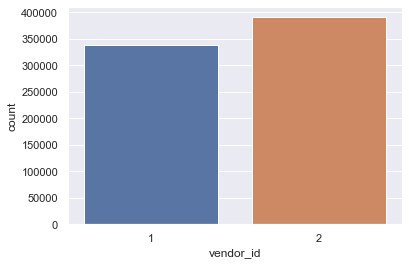

In [67]:
sns.countplot(x='vendor_id',data=sd)

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

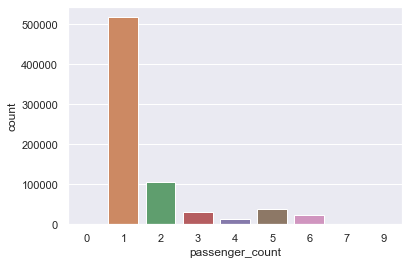

In [66]:
sns.countplot(x='passenger_count',data=sd)

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

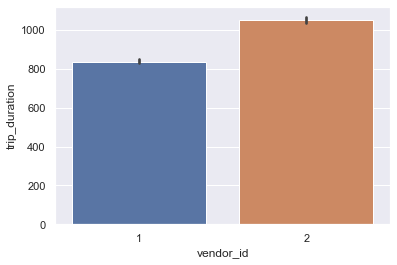

In [75]:
sns.barplot(y='trip_duration',x='vendor_id',data=sd,estimator=nm.mean)

<AxesSubplot:xlabel='pickup_hour', ylabel='trip_duration'>

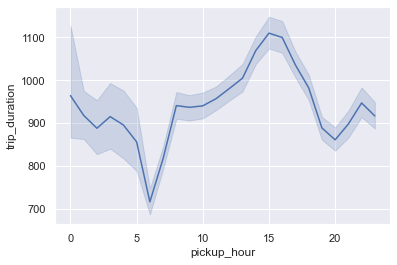

In [77]:
sns.lineplot(x='pickup_hour',y='trip_duration',data=sd)

<AxesSubplot:xlabel='pickup_timeofday', ylabel='trip_duration'>

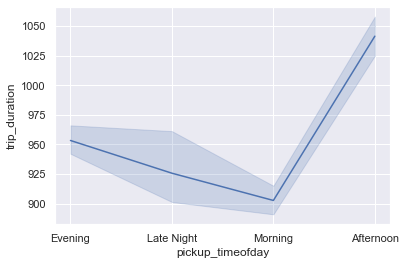

In [78]:
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=sd)

<AxesSubplot:xlabel='pickup_day_no', ylabel='trip_duration'>

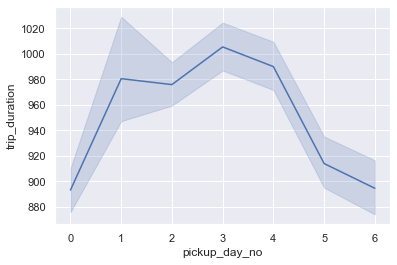

In [79]:
sns.lineplot(x='pickup_day_no',y='trip_duration',data=sd)

<AxesSubplot:xlabel='pickup_month', ylabel='trip_duration'>

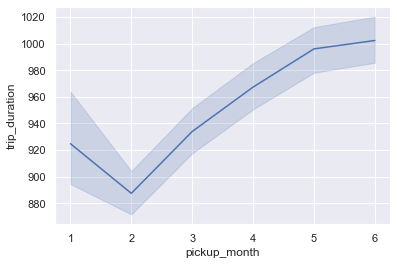

In [80]:
sns.lineplot(x='pickup_month',y='trip_duration',data=sd)

<AxesSubplot:xlabel='vendor_id', ylabel='distance'>

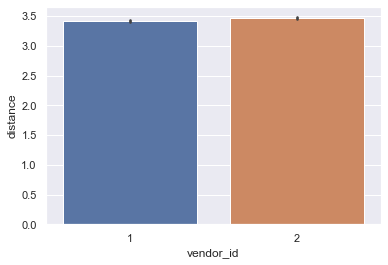

In [82]:
sns.barplot(y='distance',x='vendor_id',data=sd,estimator=nm.mean)

<AxesSubplot:xlabel='pickup_hour', ylabel='distance'>

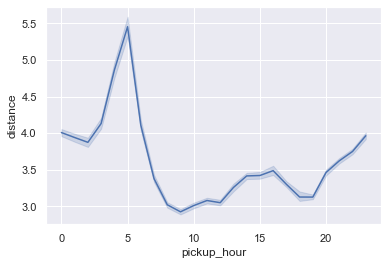

In [83]:
sns.lineplot(x='pickup_hour',y='distance',data=sd)

<AxesSubplot:xlabel='pickup_timeofday', ylabel='distance'>

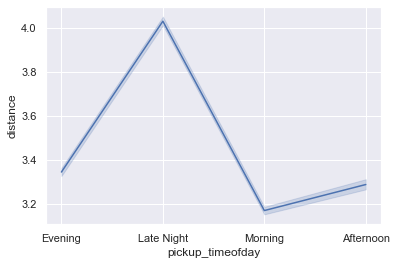

In [84]:
sns.lineplot(x='pickup_timeofday',y='distance',data=sd)

<AxesSubplot:xlabel='pickup_month', ylabel='distance'>

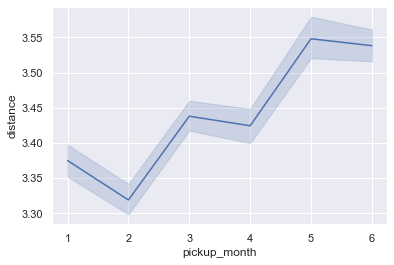

In [85]:
sns.lineplot(x='pickup_month',y='distance',data=sd)

<AxesSubplot:xlabel='vendor_id', ylabel='passenger_count'>

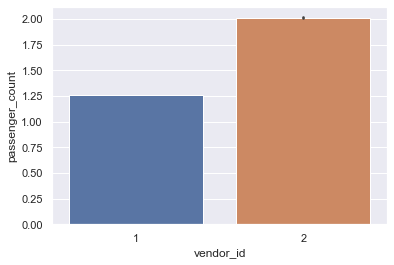

In [86]:
sns.barplot(y='passenger_count',x='vendor_id',data=sd)